In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
#import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors





/home/brett/.local/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


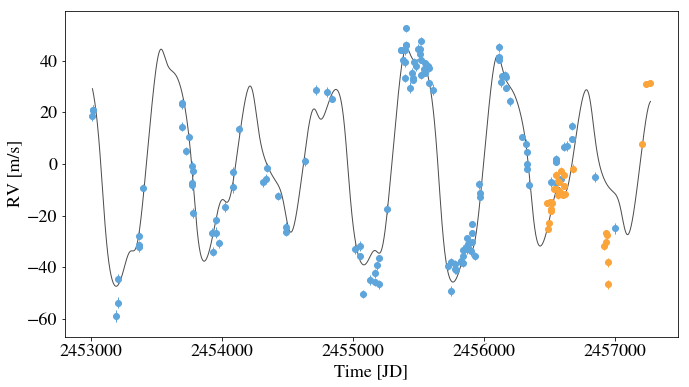

In [2]:
HD5319 = RVSystem(mstar = 1.56)
epoch = 2453019

HD5319.clear_planets()
HD5319.add_planet(per=879.79,mass=0.92,M=55.24,e=0.056,pomega=28.8)
HD5319.add_planet(per=637.8,mass=1.94,M=304.32,e=0.04,pomega=111.14)
HD5319.add_planet(per=233.2,mass=0.328,M=250.87,e=0.1378,pomega=86.18)
## system set up, get proper epoch from wynn's systemic




HD5319.RV_data = ['HD5319_KECK.vels','HD5319_APF.vels']


#def opt_offsets(offsets):
 #   HD5319.offsets = offsets
  #  return -HD5319.log_like(epoch=epoch)

#t_0 = time.time()

#guess = [-5.63371,-0.09120]
#result = op.minimize(opt_offsets,guess)
#HD5319.offsets = result.x
#print "That took  %.3f seconds" %(time.time()-t_0)
#print HD5319.offsets


offsets=[0.38073967,10.81785338]
HD5319.offsets=offsets
HD5319.plot_RV(epoch=epoch,pnts_per_period=1000)

## ok so now that it's all set up (for the most part), let's start with some basic stuff..##

In [3]:
def initial_GA(chromosome):
    per0,per1,per2,M0,M1,M2,pom0,pom1,pom2=chromosome

    HD5319.clear_planets()
    HD5319.add_planet(per=per0,mass=0.92,M=M0,e=0.056,pomega=pom0)
    HD5319.add_planet(per=per1,mass=1.94,M=M1,e=0.04,pomega=pom1)
    HD5319.add_planet(per=per2,mass=0.328,M=M2,e=0.1378,pomega=pom2)
    x=-HD5319.stab_logprob(epoch=epoch,pnts_per_period=50,time=1e5)
    return x
    

In [5]:
length=9
bounds=[[750,900],[550,700],[175,275],[30,90],[240,350],[200,300],[15,70],[80,150],[60,130]]
result=HD5319.genetic_search(bounds,length,initial_GA,num_gen=1000,mutation=0.25,pop_size=200,freq_stat=10,cores=0)

/usr/local/lib/python2.7/dist-packages/rebound/simulation.py:518: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)


Gen. 0 (0.00%):

/usr/local/lib/python2.7/dist-packages/pyevolve/GPopulation.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s = self[ind].score - self.stats["rawAve"]


 Max/Min/Avg Fitness(Raw) [inf(inf)/12875.83(12875.83)/inf(inf)]

	A break was detected, you have interrupted the evolution !

Gen. 6 (0.60%): Max/Min/Avg Fitness(Raw) [inf(inf)/2473.29(2473.29)/inf(inf)]
Total time elapsed: 12970.473 seconds.


In [6]:
result

- GenomeBase
	Score:			 2473.285724
	Fitness:		 2473.285724

	Params:		 {'allele': - GAlleles
	Homogeneous:	 False
	List size:	 9
	Alleles:

Allele for 0 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [750] to [900]

Allele for 1 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [550] to [700]

Allele for 2 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [175] to [275]

Allele for 3 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [30] to [90]

Allele for 4 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [240] to [350]

Allele for 5 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [200] to [300]

Allele for 6 position:
- GAlleleRange
	Real:		 True
	Ranges Count:	 1
	Range List:
			 Range from [15] to [70]

Allele for 7 position:
- GAlleleRange
	Real:		 True
	Ranges Count

In [8]:
HD5319.clear_planets()
HD5319.add_planet(per=858.3,mass=0.92,M=41.1,e=0.056,pomega=16.3)
HD5319.add_planet(per=627.6,mass=1.9,M=303.1,e=0.04,pomega=91.5)
HD5319.add_planet(per=231.85,mass=0.3,M=210.33,e=0.1378,pomega=63.2)
#.328 and 1.94

In [9]:
HD5319.calc_chi2(epoch=epoch)/(198-17)

25.167368375900054

In [ ]:
HD5319.orbit_stab(periods=1e6,pnts_per_period=80,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

  0 %
 10 %
 20 %
 30 %
 40 %
 50 %
